# Customer Churn Prediction 2020
### Predict whether a customer will change telco provider

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("churn.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## Data Wrangling

In [3]:
df.groupby("churn").mean()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churn,,,,,,,,,,,,,,,
no,99.924973,8.177437,175.555093,99.813801,29.844948,198.570674,100.231380,16.878743,199.577519,99.942771,8.981131,10.194441,4.460570,2.753018,1.441676
yes,102.137124,4.299331,208.990134,100.478261,35.528679,209.964883,99.841137,17.847207,206.331773,99.209030,9.285033,10.632441,4.217391,2.871254,2.275920


In [4]:
df.isnull().sum()  # No-null values found

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [5]:
df["area_code"] =df["area_code"].map(lambda x: x[10:])

In [6]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [7]:
def convert(x):
    if x=="yes":
        return 1
    else:
        return 0

In [8]:
df["international_plan"]=df["international_plan"].apply(convert)

In [9]:
df["voice_mail_plan"]=df["voice_mail_plan"].apply(convert)

In [10]:
df["state"].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [11]:
X=df.drop(["state","churn"],axis=1)
y=df["churn"]

In [12]:
state_dummies=pd.get_dummies(df["state"]).drop("WY",axis=1)

In [13]:
X=pd.concat([state_dummies,X],axis=1)

In [14]:
X.head(3)

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,0,0,0,0,0,0,0,0,0,...,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,0,0,0,0,0,0,0,0,0,0,...,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,0,0,0,0,0,0,0,0,0,0,...,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2


## Data Visualisation

Feature Engineering, outlier detection

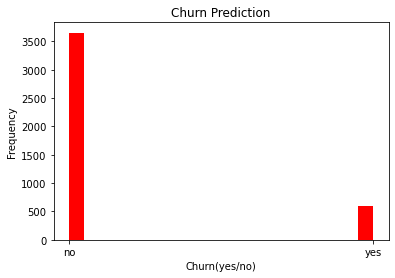

In [15]:
#Binning
fig,ax = plt.subplots()
ax.hist(df['churn'],facecolor='red',bins=20)
ax.set_title('Churn Prediction')
ax.set_xlabel('Churn(yes/no)')
ax.set_ylabel('Frequency')
plt.show()

In [16]:
#Visualization

In [17]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [18]:
#Table of proportions
intl_churn=pd.crosstab(df["international_plan"],df["churn"],margins=True)
intl_churn

churn,no,yes,All
international_plan,,,
0,3423,431,3854
1,229,167,396
All,3652,598,4250


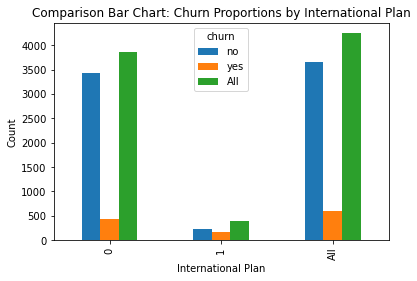

In [19]:
#Clustered Bar Graph;churn by international plan
intl_churn.plot(kind='bar',legend=True,title='Comparison Bar Chart: Churn Proportions by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

In [20]:
#Table of proportions
vmailplan_churn=pd.crosstab(df["voice_mail_plan"],df["churn"],margins=True)
vmailplan_churn

churn,no,yes,All
voice_mail_plan,,,
0,2622,516,3138
1,1030,82,1112
All,3652,598,4250


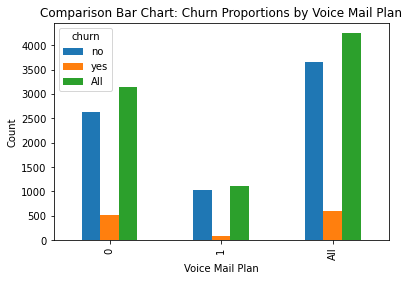

In [21]:
#Clustered Bar Graph;churn by vmail plan
vmailplan_churn.plot(kind='bar',legend=True,title='Comparison Bar Chart: Churn Proportions by Voice Mail Plan')
plt.ylabel('Count')
plt.xlabel('Voice Mail Plan')
plt.show()

In [22]:
#Table of proportions
cust_service_calls_churn=pd.crosstab(df["number_customer_service_calls"],df["churn"],margins=True)
cust_service_calls_churn

churn,no,yes,All
number_customer_service_calls,,,
0,789,97,886
1,1358,166,1524
2,845,102,947
3,495,63,558
4,117,92,209
5,32,49,81
6,9,19,28
7,6,7,13
8,1,1,2


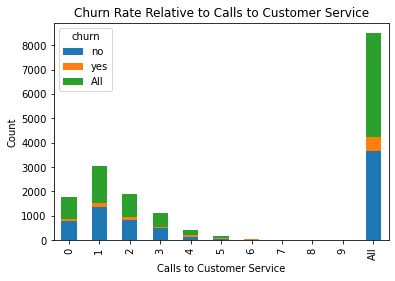

In [23]:
#Stacked Bar of Customer Service Calls and Churn
cust_service_calls_churn.plot(kind='bar',stacked=True)
plt.xlabel('Calls to Customer Service')
plt.ylabel('Count')
plt.title('Churn Rate Relative to Calls to Customer Service')
plt.show()

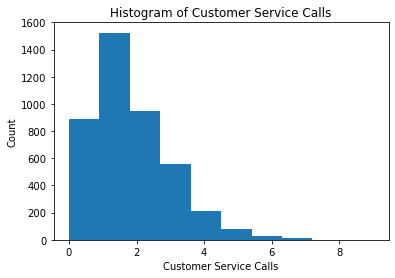

In [24]:
#Histogram of Customer Service Calls
plt.hist(df['number_customer_service_calls'])
plt.title('Histogram of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.show()

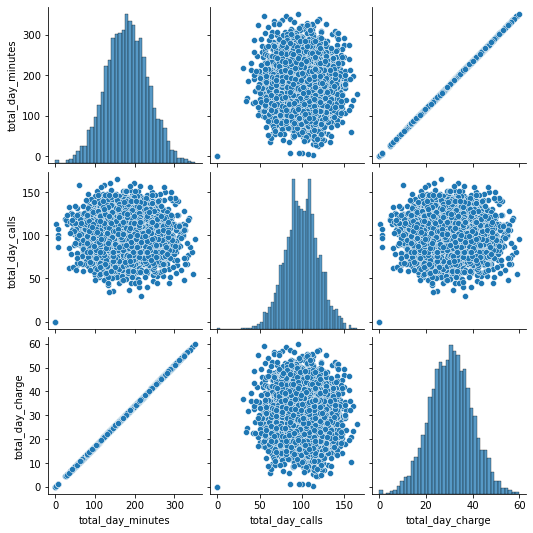

In [25]:
#Scatterplot Matrix
sns.pairplot(data=df,vars=['total_day_minutes','total_day_calls','total_day_charge'])
plt.show()

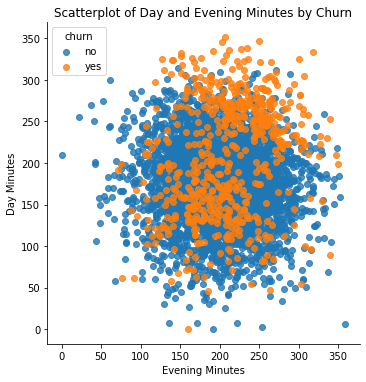

In [54]:
#Scatterplot of Evening Minutes and Day Minutes by Churn
sns.lmplot(x='total_eve_minutes',y='total_day_minutes',data=df,hue='churn',fit_reg=False,legend_out=False)
plt.title('Scatterplot of Day and Evening Minutes by Churn')
plt.xlabel('Evening Minutes')
plt.ylabel('Day Minutes')
plt.show()

### Outlier Detection using Percentile-method

In [28]:
df.shape

(4250, 20)

In [29]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [30]:
min_thresold,max_thresold=df.number_customer_service_calls.quantile([0.001,0.999])
min_thresold,max_thresold

(0.0, 7.0)

In [31]:
df[(df.number_customer_service_calls < min_thresold) & (df.number_customer_service_calls > max_thresold)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [32]:
min_thresold,max_thresold=df.total_intl_charge.quantile([0.001,0.999])
min_thresold,max_thresold

(0.0, 5.160080000000016)

In [33]:
df[(df.total_intl_charge < min_thresold) & (df.total_intl_charge > max_thresold)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [34]:
min_thresold,max_thresold=df.total_night_charge.quantile([0.001,0.999])
min_thresold,max_thresold

(2.10747, 16.517630000000025)

In [35]:
df[(df.total_night_charge < min_thresold) & (df.total_night_charge > max_thresold)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [36]:
min_thresold,max_thresold=df.total_eve_charge.quantile([0.001,0.999])
min_thresold,max_thresold

(3.59498, 29.59510000000002)

In [37]:
df[(df.total_eve_charge < min_thresold) & (df.total_eve_charge > max_thresold)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [38]:
min_thresold,max_thresold=df.total_day_charge.quantile([0.001,0.999])
min_thresold,max_thresold

(1.24739, 57.28032000000007)

In [39]:
df[(df.total_day_charge < min_thresold) & (df.total_day_charge > max_thresold)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [40]:
#No Outliers were found.

## Model Training

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
model=RandomForestClassifier(n_estimators=400)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9522451888809693

In [68]:
y_pred=model.predict(X_test)   #predictions

**Accuracy-Report**

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(confusion_matrix(y_test,y_pred),"\n\n")
print(classification_report(y_test,y_pred))

[[1188    3]
 [  64  148]] 


              precision    recall  f1-score   support

          no       0.95      1.00      0.97      1191
         yes       0.98      0.70      0.82       212

    accuracy                           0.95      1403
   macro avg       0.96      0.85      0.89      1403
weighted avg       0.95      0.95      0.95      1403

